<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [52]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [53]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,597998,2013-04-03,9,6,9,9,1,0.1,6,9,2013,1,0,0,128,0,1
1,597998,2013-04-03,9,6,9,9,1,0.2,6,9,2013,1,0,0,128,4,1
2,597998,2013-04-03,9,6,9,9,1,0.3,6,9,2013,1,0,0,128,5,1
3,597998,2013-04-03,9,6,9,9,1,0.4,6,9,2013,1,0,0,128,5,1
4,597998,2013-04-03,9,6,9,9,1,0.5,6,9,2013,1,0,0,128,5,1


In [54]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [55]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [56]:
# new is the training set and t is the test set

In [57]:
tnew = t.drop(t[(t.over <= 11.0) | (t.over >=16.0)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,9,6,9,1,11.1,6,9,1,0,0,76,3
1,9,6,9,1,11.2,6,9,1,0,0,77,3
2,9,6,9,1,11.3,6,9,1,0,0,78,3
3,9,6,9,1,11.4,6,9,1,0,0,79,3
4,9,6,9,1,11.5,6,9,1,0,0,79,3


In [58]:
xnew = new.drop(new[(new.over <=11.0) | (new.over >=16.0)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,11.1,9,5,1,0,0,102,1
1,5,9,5,1,11.2,9,5,1,0,0,108,1
2,5,9,5,1,11.3,9,5,1,0,0,110,1
3,5,9,5,1,11.4,9,5,1,0,0,111,1
4,5,9,5,1,11.5,9,5,1,0,0,111,1


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [60]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [62]:
model = Sequential()
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [63]:
history= model.fit(x=xnewt, y=y1train, epochs=140, 
          validation_data=(tnewt,y1test))

Epoch 1/140
1370/1370 [==============================] - 4s 3ms/step - loss: 2791.1028 - val_loss: 372.7012
Epoch 2/140
1370/1370 [==============================] - 3s 2ms/step - loss: 1525.8059 - val_loss: 299.8361
Epoch 3/140
1370/1370 [==============================] - 3s 3ms/step - loss: 1439.3613 - val_loss: 278.0339
Epoch 4/140
1370/1370 [==============================] - 3s 2ms/step - loss: 1375.2325 - val_loss: 271.5066
Epoch 5/140
1370/1370 [==============================] - 3s 2ms/step - loss: 1336.8966 - val_loss: 279.3993
Epoch 6/140
1370/1370 [==============================] - 3s 2ms/step - loss: 1299.4257 - val_loss: 278.1514
Epoch 7/140
1370/1370 [==============================] - 3s 2ms/step - loss: 1266.7188 - val_loss: 277.5673
Epoch 8/140
1370/1370 [==============================] - 3s 2ms/step - loss: 1250.3781 - val_loss: 277.8245
Epoch 9/140
1370/1370 [==============================] - 3s 3ms/step - loss: 1192.0187 - val_loss: 250.5584
Epoch 10/140
1370/1370 [====

In [64]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


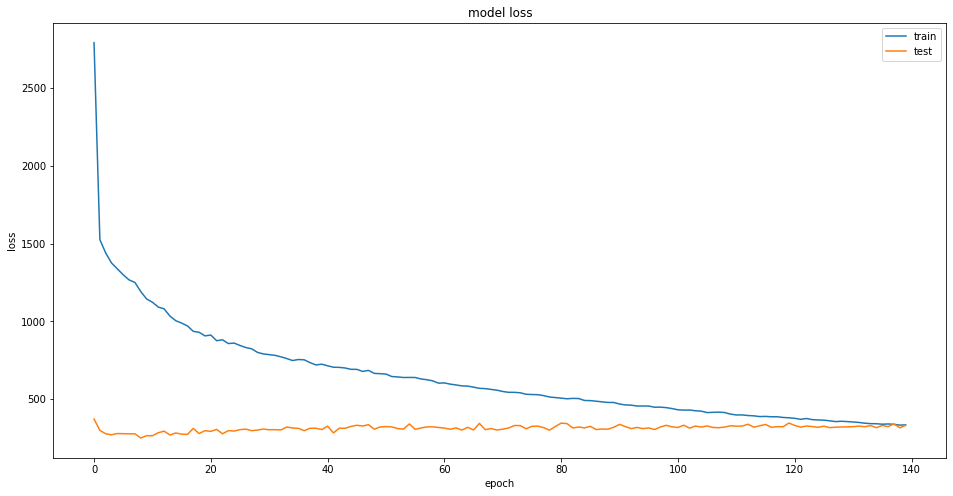

In [102]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [65]:
y1test = y1test.ravel()

In [66]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,160.930878,128
1,161.428955,128
2,161.889450,128
3,162.354736,128
4,161.783295,128
5,145.781509,128
6,145.739090,128
7,145.081268,128
8,144.457886,128
9,149.926392,128


In [67]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [68]:
custom_accuracy(sample['Actual'] , sample['Predict'],10)

44.34003496503497

In [69]:
# sample.to_csv('sample.csv')

In [70]:
# try1 = sample[sample.Actual == 128]
# try1.head()

In [71]:
# try1.shape[0]

In [72]:
# try1.sum()

In [73]:
# (try1.sum())/try1.shape[0]

In [74]:
# try2 = sample[sample.Actual == 129]
# (try2.sum())/try2.shape[0]

In [75]:
# try2 = sample[sample.Actual == 156]
# result = (try2.sum())/try2.shape[0]

In [76]:
# result

In [77]:
# res2 = result.values.reshape(1,2)

In [78]:
# res2

In [79]:
# res2.shape

In [80]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [81]:
ar1 = sample['Actual'].unique()

In [82]:
results = pd.DataFrame()

In [83]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [84]:
results.head()

,0,1
0,143.456921,128.0
0,148.857406,129.0
0,150.594925,156.0
0,157.788715,154.0
0,145.570964,126.0


In [85]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [86]:
results.reset_index(drop = True)

,Predict,Actual
0,143.456921,128.0
1,148.857406,129.0
2,150.594925,156.0
3,157.788715,154.0
4,145.570964,126.0
...,...,...
79,196.992126,190.0
80,123.679546,113.0
81,159.703739,172.0
82,146.114006,134.0


In [87]:
results.tail()

,Predict,Actual
0,196.992126,190.0
0,123.679546,113.0
0,159.703739,172.0
0,146.114006,134.0
0,172.437712,192.0


In [88]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

50.0


In [89]:
# results.info()

In [90]:
# results['Actual']

take epochs = 90 next time

In [91]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [92]:
sets = tests.drop(tests[(tests.over <= 11.0) | (tests.over >=16.0)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,11.1,12,5,1,0,0,95,2
1,12,5,5,1,11.2,12,5,1,0,0,95,2
2,12,5,5,1,11.3,12,5,1,0,0,96,2
3,12,5,5,1,11.4,12,5,1,0,0,96,2
4,12,5,5,1,11.5,12,5,1,0,0,97,2


In [93]:
yt1 = yt1.ravel()

In [94]:
xs = sc.fit_transform(sets)

In [95]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,171.563995,159
1,171.071823,159
2,171.133362,159
3,170.463043,159
4,170.530457,159
5,170.601746,159
6,168.241699,159
7,170.336670,159
8,170.418839,159
9,170.501007,159


In [96]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [97]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

48.57142857142857
